## NYT数据集

NYT-10数据发布于Riedel et al, 2010这篇论文中，其文本来源于纽约时报New York Times所标注的语料，命名实体是通过 Stanford NER 工具并结合 Freebase 知识库进行标注的。命名实体对之间的关系是链接和参考外部的Freebase知识库中的关系，结合远监督方法所得到的。


## NYT数据分析

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
train=pd.read_json('data/NYT/train_triples.json')
dev=pd.read_json('data/NYT/dev_triples.json')
test=pd.read_json('data/NYT/test_triples.json')

In [7]:
train.shape,dev.shape,test.shape

((56195, 2), (4999, 2), (5000, 2))

In [6]:
train.head()

,text,triple_list
0,Massachusetts ASTON MAGNA Great Barrington ; a...,"[[Annandale-on-Hudson, /location/location/cont..."
1,North Carolina EASTERN MUSIC FESTIVAL Greensbo...,"[[Carolina, /location/location/contains, Green..."
2,It will be the final movie credited to Debra H...,"[[Hill, /people/person/place_of_birth, Haddonf..."
3,In a 3-0 victory over the Crew on Saturday in ...,"[[Ohio, /location/location/contains, Columbus]]"
4,"The United States ambassador to Mexico , Tony ...","[[Mexico, /location/location/contains, Laredo]]"


训练集中关系每个文本关系个数

In [16]:
train['triple_nums']=train['triple_list'].apply(lambda x:len(x))
train['triple_nums']

0        1
1        1
2        1
3        1
4        1
        ..
56190    1
56191    2
56192    1
56193    2
56194    4
Name: triple_nums, Length: 56195, dtype: int64

In [18]:
train['triple_nums'].describe()

count    56195.000000
mean         1.570478
std          1.010864
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         20.000000
Name: triple_nums, dtype: float64

In [19]:
train['triple_nums'].value_counts()

1     36868
2     12058
3      3663
4      2618
5       517
6       268
7       110
8        58
9        14
10       10
12        4
15        3
20        1
14        1
17        1
11        1
Name: triple_nums, dtype: int64

从上面统计结果可以看出：
- 一个文本中可能存在一条或者多条关系
- 其中在训练集中一个文本最少存在1个三元组关系对，最多20个
- 绝大数文本存在1个关系，其次是存在2个

In [20]:
train['relations']=train['triple_list'].apply(lambda x:[triple[1] for triple in x])

In [21]:
train['relations'].head()

0      [/location/location/contains]
1      [/location/location/contains]
2    [/people/person/place_of_birth]
3      [/location/location/contains]
4      [/location/location/contains]
Name: relations, dtype: object

统计所有关系类别数量分布

In [25]:
all_relations=[]

for relations in train['relations']:
    all_relations.extend(relations)

In [28]:
pd.Series(all_relations).value_counts()

/location/location/contains                           42895
/people/person/nationality                             6598
/people/person/place_lived                             6178
/location/country/capital                              6114
/location/administrative_division/country              5109
/location/country/administrative_divisions             5109
/business/person/company                               4728
/location/neighborhood/neighborhood_of                 4671
/people/person/place_of_birth                          2699
/people/deceased_person/place_of_death                 1676
/business/company/founders                              682
/people/person/children                                 434
/business/company/place_founded                         346
/business/company/major_shareholders                    238
/business/company_shareholder/major_shareholder_of      238
/sports/sports_team/location                            186
/sports/sports_team_location/teams      

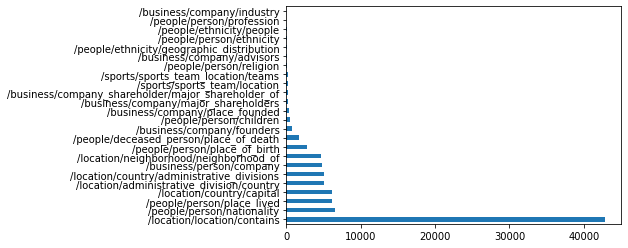

In [36]:
pd.Series(all_relations).value_counts().plot(kind='barh')
plt.show()

可以看到类别分布极不平衡，其中出现次数最多的关系是/location/location/contains，出现了4万多次，出现次数最少的关系是/business/company/industry，只有1次

|关系|中文名称|数量|
|----|----|----|
|/location/location/contains   | /位置/位置/包含| 42895|
/people/person/nationality     | /人/人/国籍   |6598|
/people/person/place_lived     | /人/人/居住地| 6178|
/location/country/capital      |  /地点/国家/首都| 6114|
/location/administrative_division/country|/位置/行政区/国家| 5109|
/location/country/administrative_divisions|/地点/国家/行政区划| 5109|
/business/person/company | /企业/人/公司| 4728|
/location/neighborhood/neighborhood_of|/位置/邻里/邻里关系|4671|
/people/person/place_of_birth| /人/人/出生地| 2699|
/people/deceased_person/place_of_death|/人/死者/死亡地| 1676|
/business/company/founders |/商业/公司/创始人|  682|
/people/person/children  |/人/人/儿童|  434|
/business/company/place_founded|/业务/公司/地点成立|  346|
/business/company/major_shareholders|/业务/公司/主要股东|  238|
/business/company_shareholder/major_shareholder_of| /业务/公司_股东/主要股东   |  238|
/sports/sports_team/location|/体育/运动队/地点|  186|
/sports/sports_team_location/teams|/体育/运动队位置/团队|  186|
/people/person/religion|/人/人/宗教|   56|
/business/company/advisors| /业务/公司/顾问|   37|
/people/ethnicity/geographic_distribution|/人民/种族/地理分布|   32|
/people/person/ethnicity|/人/人/种族|   19|
/people/ethnicity/people|/人/种族/人|   19|
/people/person/profession |/人/人/职业|    2|

## NYT 示例样本

In [54]:
sample={
  "text": "In a 3-0 victory over the Crew on Saturday in Columbus , Ohio , goalkeeper Zach Wells stopped Kyle Martino 's penalty kick , only the third unsuccessful penalty in 20 attempts in M.L.S . this season .",
  "triple_list": [
    [
      "Ohio",
      "/location/location/contains",
      "Columbus"
    ]
  ]
}
smaple

{'text': "In a 3-0 victory over the Crew on Saturday in Columbus , Ohio , goalkeeper Zach Wells stopped Kyle Martino 's penalty kick , only the third unsuccessful penalty in 20 attempts in M.L.S . this season .",
 'triple_list': [['Ohio', '/location/location/contains', 'Columbus']]}

'Ohio', '/location/location/contains', 'Columbusd ： '俄亥俄', '/位置/位置/包含', '哥伦布'

## NYT 文本长度分析

In [50]:
from transformers import AutoTokenizer
tokenizer=AutoTokenizer.from_pretrained('bert-base-uncased')

'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /bert-base-uncased/resolve/main/tokenizer_config.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000281ABE30130>, 'Connection to huggingface.co timed out. (connect timeout=10)'))' thrown while requesting HEAD https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json


In [51]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [55]:
tokenizer(sample['text'])

{'input_ids': [101, 1999, 1037, 1017, 1011, 1014, 3377, 2058, 1996, 3626, 2006, 5095, 1999, 8912, 1010, 4058, 1010, 9653, 12397, 7051, 3030, 7648, 3235, 2080, 1005, 1055, 6531, 5926, 1010, 2069, 1996, 2353, 7736, 6531, 1999, 2322, 4740, 1999, 1049, 1012, 1048, 1012, 1055, 1012, 2023, 2161, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [56]:
train['word_len']=train['text'].apply(lambda x:len(tokenizer(x)['input_ids']))

<Axes: ylabel='Density'>

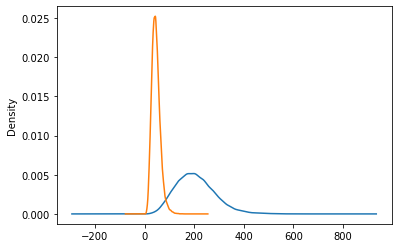

In [57]:
train['char_len']=train['text'].map(len)
train['char_len'].plot.kde()
train['word_len'].plot.kde()

In [58]:
train['word_len'].describe()

count    56195.000000
mean        45.972062
std         17.026058
min          6.000000
25%         34.000000
50%         44.000000
75%         56.000000
max        172.000000
Name: word_len, dtype: float64

In [59]:
train['char_len'].describe()

count    56195.000000
mean       204.765815
std         77.901052
min         14.000000
25%        149.000000
50%        198.000000
75%        252.000000
max        627.000000
Name: char_len, dtype: float64

- 文本原始字符个数范围为14到627个
- 经过bert分词器编码之后的文本长度范围为`6~172`